# Simulations

# 1. Ej 14.15 de Hastie

Generate 200 observations of three variates X1, X2, X3 according to:

```
X1 ∼ Z1

X2 = X1+0.001 · Z2

X3 = 10 · Z3
```

where Z1,Z2,Z3 are independent standard normal variates. Compute the leading principal component and factor analysis directions. Hence show that the leading principal component aligns itself in the maximal variance direction X3, while the leading factor essentially ignores the uncorrelated component X3, and picks up the correlated component X2 + X1.


In [21]:
import numpy as np

Z = np.random.randn(200, 3)

X1 = Z[:, 0]
X2 = X1 + 0.001 * Z[:, 1]
X3 = 10 * Z[:, 2]

X = np.array((X1, X2, X3)).T

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>]], dtype=object)

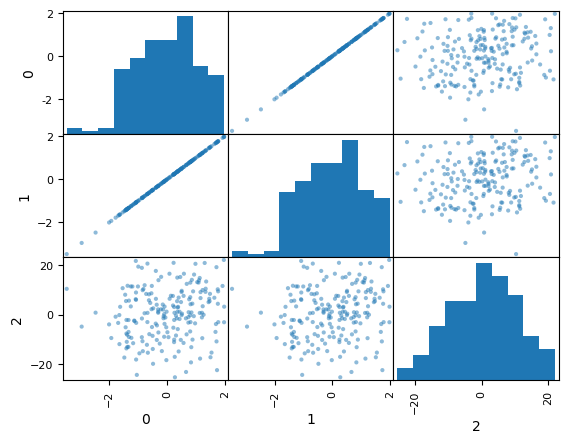

In [22]:
import pandas as pd

pd.plotting.scatter_matrix(pd.DataFrame(X))

### Como PCA

In [23]:
X = X - X.mean(axis=0)

U, D, Vt = np.linalg.svd(X, full_matrices=False)

In [24]:
np.round(Vt.T, 3)

array([[ 0.015, -0.707,  0.707],
       [ 0.015, -0.707, -0.707],
       [ 1.   ,  0.022,  0.   ]])

### Como factor analysis

# 2. Coktail party

Simulate two signals in time (for example, a sinusoid and a saw signal). Mix them using a known $$A$$ mixing matrix to produce to $X$ vectors. Use ICA to separate them and get back to the original signals.

In [118]:
# Defino las señales verdaderas
t = np.linspace(0, 1, 200)
seno = 0.1 * np.sin(2*np.pi * t  / 0.2345465)
sierra = (0.25* (t + 0.3)) % 0.1

S = np.array([seno, sierra]).T

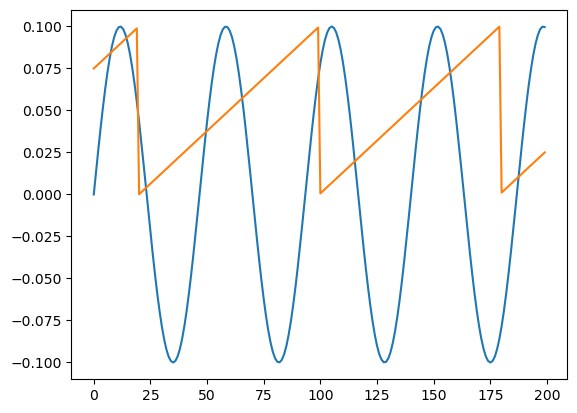

In [119]:
plt.plot(S)

In [124]:
# mezcla con una matriz ortogonal (una rotación)
theta = 0.323
A = np.array([[np.sin(theta), np.cos(theta)],
              [-np.cos(theta), np.sin(theta)]])

X = S @ A.T

Veamos las señales mezcladas

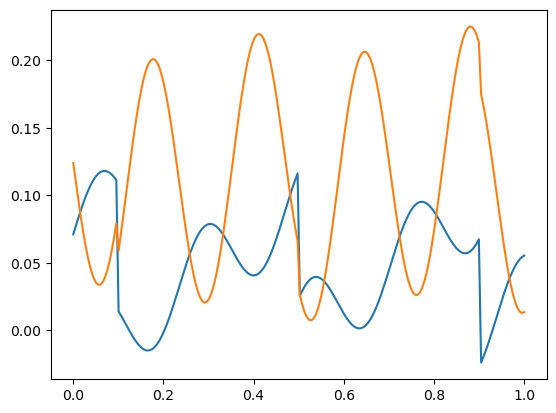

In [121]:
import matplotlib.pyplot as plt

plt.plot(t, X[:, 0])
plt.plot(t, X[:, 1] + 0.1)

Recuperación con ICA

In [122]:
from sklearn.decomposition import FastICA

myica = FastICA()

Sm = myica.fit_transform(X)

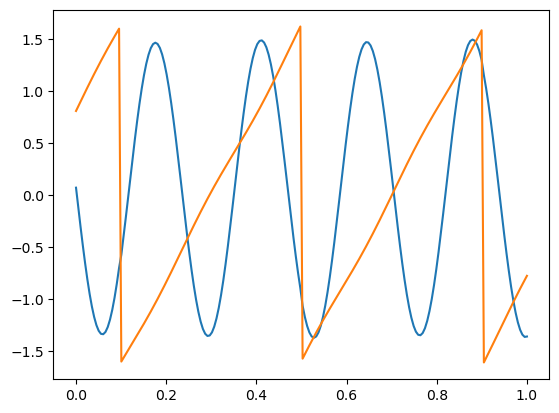

In [123]:
plt.plot(t, Sm)


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>]],
      dtype=object)

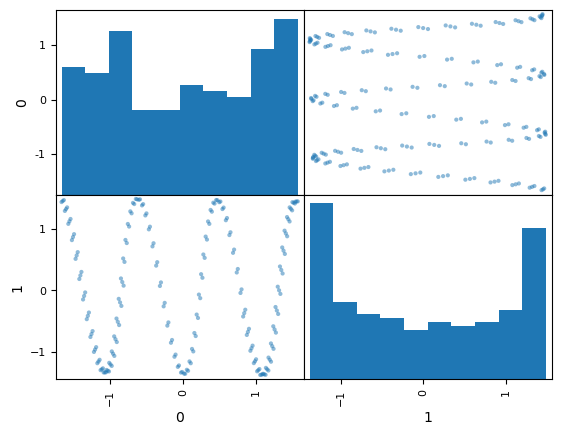

In [114]:
pd.plotting.scatter_matrix(pd.DataFrame(Sm))

3. Try solving the cocktail party problem with PCA